Solving flow with constant speed $U_x$ in the $x$ direction, advecting a quantity $\rho$.

$$\frac{\partial \rho}{\partial t} = - U_x \frac{\partial \rho}{\partial x}$$

Uses finite difference approximation:

$$ \left.\frac{\partial \rho}{\partial t}\right|_{x_n} \simeq - U_x \frac{\rho\left(x_{n+1}\right) - \rho\left(x_n\right)}{\Delta x}$$

In [39]:
from scipy.integrate import odeint
from numpy import pi, zeros, sin, arange

In [47]:
length = 1.0  # Length of the domain
x = arange(50)/50 * length  # Location of the mesh points
speed = -1.0

def density_equation(rho, t):
    "Calculate time derivative of density rho at time t"
    N = len(rho)  # Number of mesh points
    dx = length / N  # Distance between mesh points
    
    drho_dt = zeros(N) # Make array to hold time derivative result
    for n in range(N):
        n_1 = (n + 1) % N  # Next point, wrapped around so (N-1) + 1 -> 0
        drho_dt[n] = - speed * (rho[n_1] - rho[n]) / dx
    return drho_dt

In [48]:
# Set initial conditions
rho_initial = sin(2*pi * x)

In [49]:
# Solve
times = [0.0, 0.25, 0.5] # Time when output is required
result = odeint(density_equation, rho_initial, times )

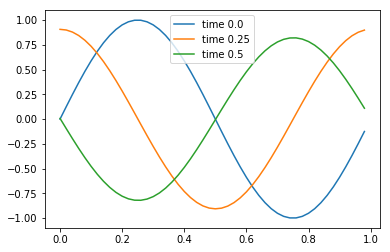

In [50]:
import matplotlib.pyplot as plt

for ti in range(result.shape[0]):
    plt.plot(x, result[ti,:], label="time {}".format(times[ti]))
plt.legend()